In [1]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

In [1]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime


data = pd.read_csv('data/Porto_taxi_data_test_partial_trajectories.csv')
#data = pd.read_csv('data/train.csv')

df = data['POLYLINE'].apply(lambda s: ast.literal_eval(s))

data['POLYLINE'] = df
data['start'] = data['POLYLINE'].apply(lambda s: s[0])
data['end'] = data['POLYLINE'].apply(lambda s: s[-1])

data['date'] = data['TIMESTAMP'].apply(lambda s: datetime.fromtimestamp(int(s)))


data.tail()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,start,end,date
315,T323,A,70885.0,NaN,20000430,1419171485,A,False,"[[-8.570196, 41.159484], [-8.570187, 41.158962...","[-8.570196, 41.159484]","[-8.593308, 41.151050999999995]",2014-12-21 09:18:05
316,T324,B,NaN,53.0,20000020,1419170802,A,False,"[[-8.613873, 41.14123200000001], [-8.613882, 4...","[-8.613873, 41.14123200000001]","[-8.629785, 41.152671]",2014-12-21 09:06:42
317,T325,C,NaN,NaN,20000207,1419172121,A,False,"[[-8.648100000000001, 41.152536], [-8.647461, ...","[-8.648100000000001, 41.152536]","[-8.643303000000001, 41.154327]",2014-12-21 09:28:41
318,T326,A,76232.0,NaN,20000667,1419171980,A,False,"[[-8.571699, 41.156073000000006], [-8.57058300...","[-8.571699, 41.156073000000006]","[-8.569206, 41.167629]",2014-12-21 09:26:20
319,T327,A,31208.0,NaN,20000255,1419171420,A,False,"[[-8.574561000000001, 41.180184], [-8.572248, ...","[-8.574561000000001, 41.180184]","[-8.592345000000002, 41.192243999999995]",2014-12-21 09:17:00


In [62]:

palette = tuple(reversed(palette))


county_xs = data['start'][0] #[county["lons"] for county in counties.values()]
county_ys = data['start'][1] #[county["lats"] for county in counties.values()]



In [64]:
import geopandas as gpd

# File path
points_fp = r"data/shapes/PRT_roads.shp"

# Read the data
points = gpd.read_file(points_fp)


In [66]:
points.tail()

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
763,Without Median,Primary Route,Road,PRT,None,"LINESTRING (-7.03919 38.88257, -7.04467 38.883..."
764,Without Median,Secondary Route,Road,PRT,None,"LINESTRING (-7.16481 38.79284, -7.16500 38.792..."
765,Without Median,Secondary Route,Road,PRT,None,"LINESTRING (-7.23666 38.73615, -7.23197 38.734..."
766,Without Median,Secondary Route,Road,PRT,None,"LINESTRING (-7.25580 38.37759, -7.25603 38.37759)"
767,Without Median,Secondary Route,Road,PRT,None,"LINESTRING (-7.13728 38.23579, -7.13500 38.23657)"


In [2]:
data['year'] =data['date'].dt.year
data['month'] =data['date'].dt.month
data['day'] =data['date'].dt.day
data['hour'] =data['date'].dt.hour
data['minute'] =data['date'].dt.minute

In [3]:
data_grp = data.groupby(['year','month','day','hour']).count()
data_grp = pd.DataFrame(data_grp).reset_index()
data_grp.head()

,year,month,day,hour,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,start,end,date,minute
0,2014,8,14,12,1,1,0,0,1,1,1,1,1,1,1,1,1
1,2014,8,14,13,73,73,8,43,73,73,73,73,73,73,73,73,73
2,2014,9,30,2,1,1,0,0,1,1,1,1,1,1,1,1,1
3,2014,9,30,3,5,5,0,3,5,5,5,5,5,5,5,5,5
4,2014,9,30,4,71,71,27,25,71,71,71,71,71,71,71,71,71


In [4]:
data_grp = data_grp.set_index(['year','month','day','hour','minute'])

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year,month,day,hour,minute'>

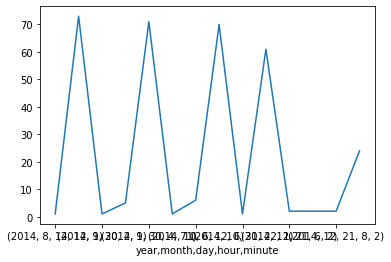

In [5]:
data_grp['TRIP_ID'].plot()

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year,month,day,hour,minute'>

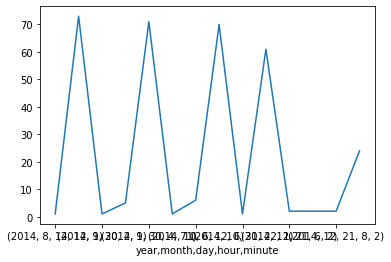

In [6]:
data_grp['TAXI_ID'].plot()

In [ ]:
# markov model can be used to model this process
# every thirty minutes, we estimate what is the best move next.
# taxi, trip, location, 